In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools

import warnings
# Suppress specific warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Financial Assistance-Final.csv', parse_dates=['Date'], dayfirst=True)

In [3]:
df

,Date,District,CEFA,SHS
0,2018-06-01,North,472,565
1,2018-06-01,East,505,830
2,2018-06-01,West,480,427
3,2018-06-01,South,350,554
4,2018-06-01,Urban,83,424
...,...,...,...,...
60,2024-02-01,North,1611,510
61,2024-02-01,East,1830,784
62,2024-02-01,West,1803,565
63,2024-02-01,South,1456,504


In [4]:
districtWiseCEFA = df.pivot_table(index='Date', columns='District', values='CEFA', aggfunc='sum').fillna(0)
districtWiseSHS = df.pivot_table(index='Date', columns='District', values='SHS', aggfunc='sum').fillna(0)

In [5]:
districtWiseCEFA

District,East,North,South,Urban,West
Date,,,,,
2018-06-01,505,472,350,83,480
2018-10-01,477,448,326,91,456
2019-06-01,522,485,364,49,498
2019-10-01,501,465,352,38,477
2020-06-01,525,489,165,135,501
2020-10-01,1270,1180,945,215,1010
2021-02-01,1145,1064,753,108,1090
2021-08-01,1834,1704,1368,114,1648
2022-02-01,1689,1570,1161,114,1607


In [6]:
districtWiseSHS

District,East,North,South,Urban,West
Date,,,,,
2018-06-01,830,565,554,424,427
2018-10-01,1010,675,763,591,461
2019-06-01,1106,807,870,602,606
2019-10-01,894,545,667,505,383
2020-06-01,1020,640,704,508,458
2020-10-01,1396,829,1054,879,688
2021-02-01,1255,789,992,703,620
2021-08-01,1064,657,910,696,502
2022-02-01,959,629,752,629,494


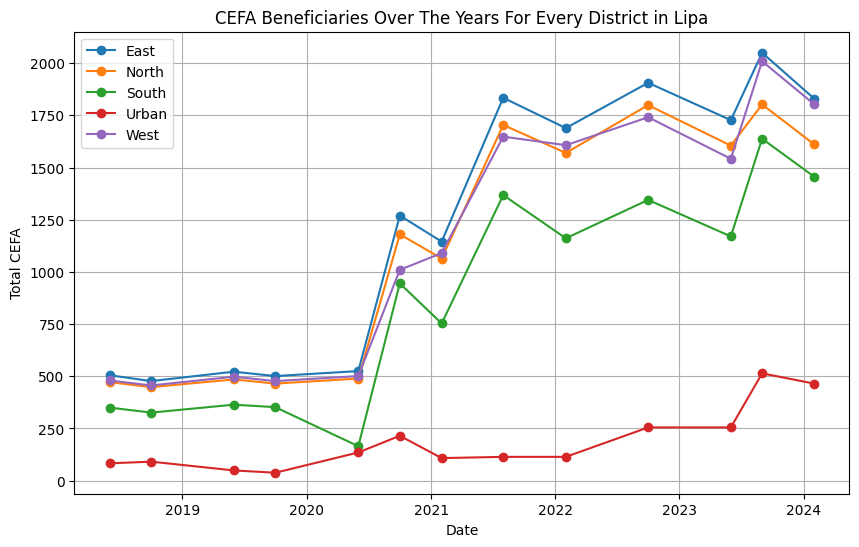

In [11]:
plt.figure(figsize=(10, 6))
for district in districtWiseCEFA.columns:
    plt.plot(districtWiseCEFA.index, districtWiseCEFA[district], label=district, marker='o')
plt.xlabel('Date')
plt.ylabel('Total CEFA')
plt.title('CEFA Beneficiaries Over The Years For Every District in Lipa')
plt.legend()
plt.grid()
plt.show()

While each district has an upward trend in their beneficiaries, they differs in overall magnitude and variability in recent years. Some districts, like Urban and South, have a more stable pattern, while others, like North and West, show more fluctuations. This suggests that while the districts have general similarities, there are enough differences in their behavior that using different parameters for each district's predictive model might improve accuracy.

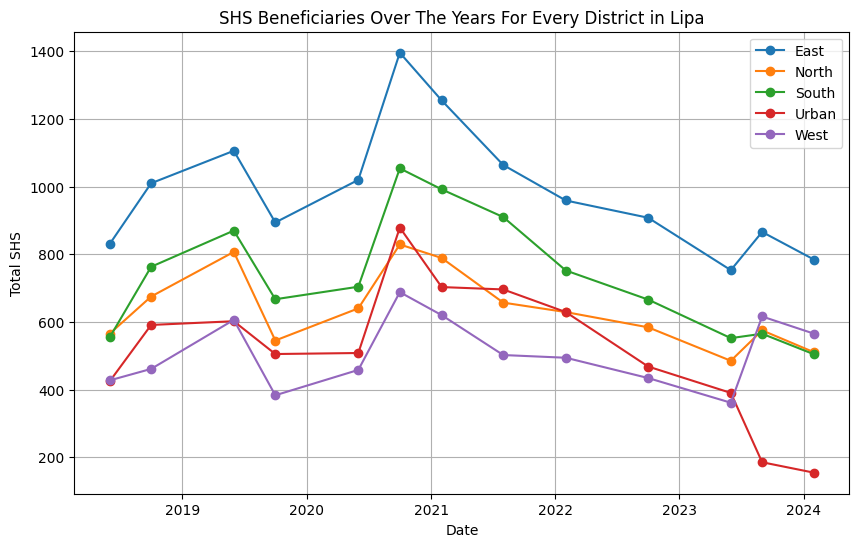

In [13]:
plt.figure(figsize=(10, 6))
for district in districtWiseSHS.columns:
    plt.plot(districtWiseSHS.index, districtWiseSHS[district], label=district, marker='o')
plt.xlabel('Date')
plt.ylabel('Total SHS')
plt.title('SHS Beneficiaries Over The Years For Every District in Lipa')
plt.legend()
plt.grid()
plt.show()

The trends for SHS beneficiaries across districts show even more divergence between each district. This suggests that the SHS program might be influenced by different factors in each district, so district-specific SARIMA models with different parameters would likely yield more accurate predictions. Each district exhibits different variability in both growth and decline, which a general model might not capture effectively.

In [ ]:
#Creating a Bivariate Analysis for WH and PC with Order Demand as Target Variable.

#Step-01: Check the Order Demand Qty by WareHouse
from matplotlib import rcParams

rcParams['figure.figsize']=20,5 #Figure Size in Inches for Plotting
f, axes = plt.subplots(1,2)

regDataWH=sn.boxplot(df['Warehouse'],df['Order_Demand'],ax=axes[0]) #Create a variable for Regular Data for WH and OD 

logDataWH=sn.boxplot(df['Warehouse'],np.log1p(df['Order_Demand']),ax=axes[1]) #Craete a Variable with Log Transformation

del regDataWH, logDataWH

#Step-02: Check the Order Demand Qty by Product Category (PC)
rcParams['figure.figsize']=20,5
f,axes =plt.subplots(1,2)

regDataPC=sn.boxplot(df['Product_Category'],df['Order_Demand'],ax=axes[0])
logDataPC=sn.boxplot(df['Product_Category'],df['Order_Demand'],ax=axes[1])

del regDataPC, logDataPC